In [157]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import sklearn
import nltk

In [158]:
df=pd.read_csv("https://raw.githubusercontent.com/paulineattal/Disney-Text-Mining/main/Scrapping/Scrapping_Newport_Bay_Club_071222.csv",sep=';')

In [159]:
df.head()

,Names,Country,room_type,reservation_type,Duration,traveler_infos,date_review,review_title,grade_review,positive_review,negative_review,usefulness_review,hotel
0,Ganna,Ukraine,Chambre Supérieure - Côté Lac,2 nuits · Septembre 2022,Septembre 2022,Famille,Le choix des voyageurs,Good choice for visiting Disneyland,10,NaN,NaN,Utile Pas utile,Disney's Newport Bay Club
1,Diego,France,Chambre Supérieure,1 nuit · Novembre 2022,Novembre 2022,Famille,Commentaire envoyé le 30 novembre 2022,Agréable,"6,0",la proximité du parc Disneyland Paris,"la qualité de la chambre n’était pas top, vieu...",Utile Pas utile,Disney's Newport Bay Club
2,Fabienne,Belgique,Chambre Supérieure,1 nuit · Novembre 2022,Novembre 2022,Famille,Commentaire envoyé le 18 novembre 2022,déçue qualité prix,"6,0",l emplacement,la propreté,Utile Pas utile,Disney's Newport Bay Club
3,Pierre,France,Chambre Supérieure,1 nuit · Novembre 2022,Novembre 2022,Famille,Commentaire envoyé le 14 novembre 2022,très moyen par rapport au prix,"6,0",très bon personnel dédié mais la sécurité fait...,hôtel très vieillissant et pas de shampoing ge...,Utile Pas utile,Disney's Newport Bay Club
4,Christine,France,Chambre Supérieure,1 nuit · Novembre 2022,Novembre 2022,Famille,Commentaire envoyé le 10 novembre 2022,Très bien,"8,0",La décoration de la chambre est adorable.\nOn ...,La porte ne marchait pas bien.\nQuand on met l...,Utile Pas utile,Disney's Newport Bay Club


In [160]:
df.shape

(2285, 13)

In [161]:
df.info()
#On voit des données manquantes dans les colonnes room-type
#positive review + negative review : toujours ensemble ? ou pas ?
#grade_review = 10 -> pas de commentaires ?

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2285 entries, 0 to 2284
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Names              2285 non-null   object
 1   Country            2283 non-null   object
 2   room_type          2137 non-null   object
 3   reservation_type   2285 non-null   object
 4   Duration           2285 non-null   object
 5   traveler_infos     2285 non-null   object
 6   date_review        2285 non-null   object
 7   review_title       2284 non-null   object
 8   grade_review       2285 non-null   object
 9   positive_review    632 non-null    object
 10  negative_review    498 non-null    object
 11  usefulness_review  1148 non-null   object
 12  hotel              2285 non-null   object
dtypes: object(13)
memory usage: 232.2+ KB


# Changement de la colonne reservation_type pour ne garder que le nombre de nuitees

In [162]:
df_nuitee=df['reservation_type'].map(str)
df_nuitee

0       2 nuits ·  Septembre 2022
1         1 nuit ·  Novembre 2022
2         1 nuit ·  Novembre 2022
3         1 nuit ·  Novembre 2022
4         1 nuit ·  Novembre 2022
                  ...            
2280      2 nuits ·  Janvier 2020
2281     2 nuits ·  Décembre 2019
2282      2 nuits ·  Janvier 2020
2283      3 nuits ·  Janvier 2020
2284     2 nuits ·  Décembre 2019
Name: reservation_type, Length: 2285, dtype: object

In [163]:
for i in range(df.shape[0]):
    df_nuitee[i]=df_nuitee[i].split()[0]
print(df_nuitee)

0       2
1       1
2       1
3       1
4       1
       ..
2280    2
2281    2
2282    2
2283    3
2284    2
Name: reservation_type, Length: 2285, dtype: object


In [164]:
df_mois_sejour=df['reservation_type'].map(str)

In [165]:
for i in range(df.shape[0]):
    df_mois_sejour[i]=df_mois_sejour[i].split()[3]
print(df_mois_sejour)

0       Septembre
1        Novembre
2        Novembre
3        Novembre
4        Novembre
          ...    
2280      Janvier
2281     Décembre
2282      Janvier
2283      Janvier
2284     Décembre
Name: reservation_type, Length: 2285, dtype: object


In [166]:
df_annee_sejour=df['reservation_type'].map(str)
for i in range(df.shape[0]):
    df_annee_sejour[i]=df_annee_sejour[i].split()[4]
print(df_annee_sejour)

0       2022
1       2022
2       2022
3       2022
4       2022
        ... 
2280    2020
2281    2019
2282    2020
2283    2020
2284    2019
Name: reservation_type, Length: 2285, dtype: object


In [167]:
df['nuitee']=df_nuitee
df['mois_sejour']=df_mois_sejour
df['annee_sejour']=df_annee_sejour

In [231]:
df.head()

,Names,Country,room_type,reservation_type,Duration,traveler_infos,date_review,review_title,grade_review,positive_review,negative_review,usefulness_review,hotel,nuitee,mois_sejour,annee_sejour
0,Ganna,Ukraine,Chambre Supérieure - Côté Lac,2 nuits · Septembre 2022,Septembre 2022,Famille,Le choix des voyageurs,Good choice for visiting Disneyland,10.0,NaN,NaN,Utile Pas utile,Disney's Newport Bay Club,2,Septembre,2022
1,Diego,France,Chambre Supérieure,1 nuit · Novembre 2022,Novembre 2022,Famille,Commentaire envoyé le 30 novembre 2022,Agréable,6.0,la proximité du parc Disneyland Paris,"la qualité de la chambre n’était pas top, vieu...",Utile Pas utile,Disney's Newport Bay Club,1,Novembre,2022
2,Fabienne,Belgique,Chambre Supérieure,1 nuit · Novembre 2022,Novembre 2022,Famille,Commentaire envoyé le 18 novembre 2022,déçue qualité prix,6.0,l emplacement,la propreté,Utile Pas utile,Disney's Newport Bay Club,1,Novembre,2022
3,Pierre,France,Chambre Supérieure,1 nuit · Novembre 2022,Novembre 2022,Famille,Commentaire envoyé le 14 novembre 2022,très moyen par rapport au prix,6.0,très bon personnel dédié mais la sécurité fait...,hôtel très vieillissant et pas de shampoing ge...,Utile Pas utile,Disney's Newport Bay Club,1,Novembre,2022
4,Christine,France,Chambre Supérieure,1 nuit · Novembre 2022,Novembre 2022,Famille,Commentaire envoyé le 10 novembre 2022,Très bien,8.0,La décoration de la chambre est adorable.\nOn ...,La porte ne marchait pas bien.\nQuand on met l...,Utile Pas utile,Disney's Newport Bay Club,1,Novembre,2022


# Changement des types de variables

In [170]:
# Liste des colonnes à transtyper en numeric
var_tofloat = ['grade_review']
for i in var_tofloat:
    df[i] = df[i].str.replace(",",".")
    df[i] = pd.to_numeric(df[i], downcast="float")

In [171]:
# Liste des colonnes à transtyper en numeric
var_toint = ['nuitee']
for i in var_toint:
    df[i] = df[i].astype('int')

In [172]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2285 entries, 0 to 2284
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Names              2285 non-null   object 
 1   Country            2283 non-null   object 
 2   room_type          2137 non-null   object 
 3   reservation_type   2285 non-null   object 
 4   Duration           2285 non-null   object 
 5   traveler_infos     2285 non-null   object 
 6   date_review        2285 non-null   object 
 7   review_title       2284 non-null   object 
 8   grade_review       2285 non-null   float32
 9   positive_review    632 non-null    object 
 10  negative_review    498 non-null    object 
 11  usefulness_review  1148 non-null   object 
 12  hotel              2285 non-null   object 
 13  nuitee             2285 non-null   int32  
 14  mois_sejour        2285 non-null   object 
 15  annee_sejour       2285 non-null   object 
dtypes: float32(1), int32(1),

In [173]:
df['grade_review'].mean()

7.40709

In [174]:
df['grade_review'].std()

2.3873701095581055

In [175]:
round(df['nuitee'].mean(),0)

2.0

In [176]:
df['nuitee'].std()

0.9511452018414313

# Commentaires positifs et négatifs

In [177]:
variables=['grade_review','Country','positive_review','negative_review']
df_selection=df[variables]
df_selection

,grade_review,Country,positive_review,negative_review
0,10.0,Ukraine,NaN,NaN
1,6.0,France,la proximité du parc Disneyland Paris,"la qualité de la chambre n’était pas top, vieu..."
2,6.0,Belgique,l emplacement,la propreté
3,6.0,France,très bon personnel dédié mais la sécurité fait...,hôtel très vieillissant et pas de shampoing ge...
4,8.0,France,La décoration de la chambre est adorable.\nOn ...,La porte ne marchait pas bien.\nQuand on met l...
...,...,...,...,...
2280,10.0,Brésil,NaN,NaN
2281,9.2,Royaume-Uni,NaN,NaN
2282,9.0,Portugal,NaN,NaN
2283,4.2,Japon,NaN,NaN


In [178]:
newlist=[]
for i in range(df_selection.shape[0]):
    if type(df_selection.positive_review[i])==float and type(df_selection.negative_review[i])==float:
        newlist.append(i)

In [179]:
df_selection=df_selection.drop(newlist)
df_selection

,grade_review,Country,positive_review,negative_review
1,6.0,France,la proximité du parc Disneyland Paris,"la qualité de la chambre n’était pas top, vieu..."
2,6.0,Belgique,l emplacement,la propreté
3,6.0,France,très bon personnel dédié mais la sécurité fait...,hôtel très vieillissant et pas de shampoing ge...
4,8.0,France,La décoration de la chambre est adorable.\nOn ...,La porte ne marchait pas bien.\nQuand on met l...
5,8.0,France,L'ambiance nautique de l'hôtel et la qualité d...,Peut être le fait qu'on ne m'ait pas offert de...
...,...,...,...,...
628,9.6,France,"Piscine et mise à disposition de boues, frites.",Petit déjeuner très varié mais un peu cher not...
629,9.6,France,Le personnel est super sympa ! L’hôtel est trè...,Les vestiaires de la piscine ne sont pas prati...
630,5.0,France,La réceptionniste des notre arrivé qui a été a...,"Saleté dans les couloirs , draps taché, aucune..."
631,10.0,France,Tout,NaN


In [180]:
df_selection[df_selection.grade_review>=8.0]

,grade_review,Country,positive_review,negative_review
4,8.0,France,La décoration de la chambre est adorable.\nOn ...,La porte ne marchait pas bien.\nQuand on met l...
5,8.0,France,L'ambiance nautique de l'hôtel et la qualité d...,Peut être le fait qu'on ne m'ait pas offert de...
12,8.0,Belgique,la situation et les décors le confort,manque d’équipements pour le prix . pas de fri...
16,8.0,France,"la déco, la piscine",rien
17,8.0,France,le décor la propreté,pas de personnages Disney
...,...,...,...,...
626,9.0,France,La gentillesse du personnel. Toujours souriant...,Notre chambre proche des ascenseurs. Beaucoup ...
628,9.6,France,"Piscine et mise à disposition de boues, frites.",Petit déjeuner très varié mais un peu cher not...
629,9.6,France,Le personnel est super sympa ! L’hôtel est trè...,Les vestiaires de la piscine ne sont pas prati...
631,10.0,France,Tout,NaN


In [181]:
df_selection[df_selection.grade_review>=8.0][['negative_review']]

,negative_review
4,La porte ne marchait pas bien.\nQuand on met l...
5,Peut être le fait qu'on ne m'ait pas offert de...
12,manque d’équipements pour le prix . pas de fri...
16,rien
17,pas de personnages Disney
...,...
626,Notre chambre proche des ascenseurs. Beaucoup ...
628,Petit déjeuner très varié mais un peu cher not...
629,Les vestiaires de la piscine ne sont pas prati...
631,NaN


In [182]:
df_selection[(df_selection.grade_review > 6.0) & (df_selection.grade_review<8.0)]

,grade_review,Country,positive_review,negative_review
6,7.0,Suisse,je pense qu’il serait judicieux afin que l’on ...,NaN
7,7.0,Suisse,le personnel,"vieux (join, accessoires) et cher \nrepas beau..."
8,7.0,Belgique,"L'hôtel est très joli, le décor est détaillé. ...","Lors de l'accueil, nous avons été accueilli pa..."
13,7.0,France,Hôtel : magnifique. Très belle décoration. Par...,La chambre : absolument pas la hauteur du prix...
14,7.0,Belgique,La chambre et le déjeuner,NaN
...,...,...,...,...
606,7.0,France,Situation géographique. Propreté des locaux. A...,Problème électrique ce qui nous a contraint à ...
607,6.2,Luxembourg,Gentillesse du personnel,Lit queen size (140cm) trop petit pour 2 adult...
610,6.7,France,Accueil\n chaleureux et personnels agréable,Pas de brochure petit déjeuner dans la chambre...
611,7.0,France,La beauté,Lits


In [183]:
df_selection[df_selection.grade_review<=6.0]

,grade_review,Country,positive_review,negative_review
1,6.0,France,la proximité du parc Disneyland Paris,"la qualité de la chambre n’était pas top, vieu..."
2,6.0,Belgique,l emplacement,la propreté
3,6.0,France,très bon personnel dédié mais la sécurité fait...,hôtel très vieillissant et pas de shampoing ge...
9,6.0,France,pas loin du parc Disney,pas conforme à ma réservation et pas à la haut...
10,6.0,France,"C'était l'usine ! L'hôtel etait noir de monde,...",NaN
...,...,...,...,...
617,3.0,France,literie,tv en panne pas propre petit déjeuner commande...
619,4.0,France,la proximité la magie,le linge de lit étais sale et retrouvé des cho...
620,4.0,France,le restaurant,la vue et le personnel
627,2.5,Belgique,Le transport jusque Disney,Le personnel pas aimable . Arriver le soir les...


In [184]:
df_selection['Country'].value_counts()

France         534
Belgique        60
Suisse          19
La Réunion       5
Allemagne        2
Canada           2
Royaume-Uni      2
Israël           1
Irlande          1
Roumanie         1
Japon            1
Maroc            1
Liban            1
Tunisie          1
Luxembourg       1
Name: Country, dtype: int64

In [185]:
df_selection[df_selection.Country=='Irlande']

,grade_review,Country,positive_review,negative_review
139,7.0,Irlande,La cohérence du décor,On devrait pouvoir choisir ch avec bain ou douche


## Analyse positive reviews

In [186]:
var=['grade_review','positive_review']
df_positive=df_selection[var]
df_positive

,grade_review,positive_review
1,6.0,la proximité du parc Disneyland Paris
2,6.0,l emplacement
3,6.0,très bon personnel dédié mais la sécurité fait...
4,8.0,La décoration de la chambre est adorable.\nOn ...
5,8.0,L'ambiance nautique de l'hôtel et la qualité d...
...,...,...
628,9.6,"Piscine et mise à disposition de boues, frites."
629,9.6,Le personnel est super sympa ! L’hôtel est trè...
630,5.0,La réceptionniste des notre arrivé qui a été a...
631,10.0,Tout


In [187]:
newlistpositif=[]
for i in range(1,df_positive.shape[0]):
    if type(df_positive.positive_review[i])==float :
        newlistpositif.append(i)

In [188]:
newlistpositif

[]

In [189]:
df_positive=df_positive.drop(newlistpositif)
df_positive

,grade_review,positive_review
1,6.0,la proximité du parc Disneyland Paris
2,6.0,l emplacement
3,6.0,très bon personnel dédié mais la sécurité fait...
4,8.0,La décoration de la chambre est adorable.\nOn ...
5,8.0,L'ambiance nautique de l'hôtel et la qualité d...
...,...,...
628,9.6,"Piscine et mise à disposition de boues, frites."
629,9.6,Le personnel est super sympa ! L’hôtel est trè...
630,5.0,La réceptionniste des notre arrivé qui a été a...
631,10.0,Tout


In [190]:
df_positive.iloc[0,1]

'la proximité du parc Disneyland Paris'

In [191]:
#récupérer la liste des ponctuations
import string
ponctuations = list(string.punctuation)
print(ponctuations)

#liste des chiffres
chiffres = list("0123456789")
print(chiffres)

#liste de mots spécifiques à retirer
special=["parc","disneyland","disney","paris","hôtel","😡😡😡😡😡😡","😡😡😡😡😡je"]

#special=["parc","disneyland","disney","paris","hôtel","😡😡😡😡😡😡","😡😡😡😡😡je","très","petit","lhôtel","bien","personnel","belle","salle","bien","chouchoute","part","trop","club","tout","plus","compass","laccueil"]

#outil pour procéder à la lemmatisation - attention à charger le cas échéant
#nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
lem = WordNetLemmatizer()

#pour la tokénisation
from nltk.tokenize import word_tokenize

#liste des mots vides
from nltk.corpus import stopwords
mots_vides = stopwords.words("french")
print(mots_vides)

['!', '"', '#', '$', '%', '&', "'", '(', ')', '*', '+', ',', '-', '.', '/', ':', ';', '<', '=', '>', '?', '@', '[', '\\', ']', '^', '_', '`', '{', '|', '}', '~']
['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
['au', 'aux', 'avec', 'ce', 'ces', 'dans', 'de', 'des', 'du', 'elle', 'en', 'et', 'eux', 'il', 'ils', 'je', 'la', 'le', 'les', 'leur', 'lui', 'ma', 'mais', 'me', 'même', 'mes', 'moi', 'mon', 'ne', 'nos', 'notre', 'nous', 'on', 'ou', 'par', 'pas', 'pour', 'qu', 'que', 'qui', 'sa', 'se', 'ses', 'son', 'sur', 'ta', 'te', 'tes', 'toi', 'ton', 'tu', 'un', 'une', 'vos', 'votre', 'vous', 'c', 'd', 'j', 'l', 'à', 'm', 'n', 's', 't', 'y', 'été', 'étée', 'étées', 'étés', 'étant', 'étante', 'étants', 'étantes', 'suis', 'es', 'est', 'sommes', 'êtes', 'sont', 'serai', 'seras', 'sera', 'serons', 'serez', 'seront', 'serais', 'serait', 'serions', 'seriez', 'seraient', 'étais', 'était', 'étions', 'étiez', 'étaient', 'fus', 'fut', 'fûmes', 'fûtes', 'furent', 'sois', 'soit', 'soyons', 'soyez', '

In [192]:
#********************************
#fonction pour nettoyage document (chaîne de caractères)
#le document revient sous la forme d'une liste de tokens
#********************************
def nettoyage_doc(doc_param):
    #passage en minuscule
    doc = doc_param.lower()
    #retrait des ponctuations
    doc = "".join([w for w in list(doc) if not w in ponctuations])
    #retirer les chiffres
    doc = "".join([w for w in list(doc) if not w in chiffres])
    #transformer le document en liste de termes par tokénisation
    doc = word_tokenize(doc)
    #lematisation de chaque terme
    doc = [lem.lemmatize(terme) for terme in doc]
    #retirer les stopwords
    doc = [w for w in doc if not w in mots_vides]
    #retirer les mots spécifiques à ces commentaires
    doc = [w for w in doc if not w in special]
    #retirer les termes de moins de 3 caractères
    doc = [w for w in doc if len(w)>3]
    #fin
    return doc

In [193]:
corpus_liste_positif=[]
for i in range(df_positive.shape[0]):
    corpus_liste_positif.append(nettoyage_doc(df_positive.iloc[i,1]))

In [194]:
#corpus_liste_positif

In [195]:
#************************
#******* Word2Vec *******
#************************
#word2vec
from gensim.models import Word2Vec
modele = Word2Vec(corpus_liste_positif,vector_size=2,window=3,min_count=1)
type(modele)
#dimensionnalité
modele.vector_size
#taille du voisinage
modele.window
#propriété "wv" -> wordvector
words = modele.wv

In [196]:
#dimension de la représentation
words.vectors.shape

(1385, 2)

In [197]:
#affichage des termes de leur index
words.key_to_index

{'très': 0,
 'personnel': 1,
 'chambre': 2,
 'piscine': 3,
 'proximité': 4,
 'tout': 5,
 'agréable': 6,
 'petit': 7,
 'bien': 8,
 'lhôtel': 9,
 'déjeuner': 10,
 'emplacement': 11,
 'accueil': 12,
 'super': 13,
 'confortable': 14,
 'literie': 15,
 'service': 16,
 'restaurant': 17,
 'avon': 18,
 'propre': 19,
 'plus': 20,
 'propreté': 21,
 'chambres': 22,
 'magnifique': 23,
 'prix': 24,
 'qualité': 25,
 'parfait': 26,
 'vraiment': 27,
 'gentillesse': 28,
 'belle': 29,
 'buffet': 30,
 'proche': 31,
 'parcs': 32,
 'enfants': 33,
 'calme': 34,
 'décor': 35,
 'bonne': 36,
 'confort': 37,
 'situation': 38,
 'séjour': 39,
 'fait': 40,
 'cadre': 41,
 'rapport': 42,
 'club': 43,
 'ambiance': 44,
 'accueillant': 45,
 'compass': 46,
 'rien': 47,
 'beau': 48,
 'laccueil': 49,
 'nuit': 50,
 'excellent': 51,
 'parking': 52,
 'cest': 53,
 'soir': 54,
 'lemplacement': 55,
 'café': 56,
 'hotel': 57,
 'trop': 58,
 'spacieuse': 59,
 'toujours': 60,
 'village': 61,
 'décoration': 62,
 'salle': 63,
 'souria

In [198]:
#les clés : les termes
words.key_to_index.keys()

dict_keys(['très', 'personnel', 'chambre', 'piscine', 'proximité', 'tout', 'agréable', 'petit', 'bien', 'lhôtel', 'déjeuner', 'emplacement', 'accueil', 'super', 'confortable', 'literie', 'service', 'restaurant', 'avon', 'propre', 'plus', 'propreté', 'chambres', 'magnifique', 'prix', 'qualité', 'parfait', 'vraiment', 'gentillesse', 'belle', 'buffet', 'proche', 'parcs', 'enfants', 'calme', 'décor', 'bonne', 'confort', 'situation', 'séjour', 'fait', 'cadre', 'rapport', 'club', 'ambiance', 'accueillant', 'compass', 'rien', 'beau', 'laccueil', 'nuit', 'excellent', 'parking', 'cest', 'soir', 'lemplacement', 'café', 'hotel', 'trop', 'spacieuse', 'toujours', 'village', 'décoration', 'salle', 'souriant', 'fois', 'aimable', 'petits', 'magie', 'choix', 'cette', 'après', 'grand', 'petite', 'localisation', 'beaucoup', 'bain', 'superbe', 'aussi', 'suite', 'cher', 'grande', 'petitdéjeuner', 'sans', 'lécoute', 'boutique', 'personnages', 'merci', 'comme', 'près', 'faire', 'surclassement', 'sympathique'

In [199]:
sorted_keys = sorted(words.key_to_index, key = lambda x : words.key_to_index.get(x, 0), reverse=True)
 
for key in sorted_keys :
    print(key, words.key_to_index[key])

jaccuzi 1384
loge 1383
satisfaite 1382
hésiter 1381
prime 1380
appelle 1379
renvoient 1378
lappli 1377
réservable 1376
dinquiétudes 1375
pouvez 1374
rendre 1373
réservations 1372
montrer 1371
habitude 1370
sympas 1369
pension 1368
utile 1367
frais 1366
compars 1365
balade 1364
bord 1363
oceane 1362
hôtesse 1361
proposés 1360
relationnel 1359
karima 1358
accueilli 1357
daisy 1356
moyennement 1355
escaliers 1354
donnée 1353
reliant 1352
grâce 1351
température 1350
satisfaits 1349
meilleur 1348
qualitéprix 1347
parmi 1346
datouts 1345
certain 1344
immédiate 1343
recommanderais 1342
inamissible 1341
payant 1340
park 1339
personnelle 1338
premier 1337
garderons 1336
offertes 1335
espérons 1334
emmènent 1333
importe 1332
correspondant 1331
rangée 1330
nettoyée 1329
correctement 1328
lappel 1327
prêts 1326
descendre 1325
ongles 1324
régale 1323
puis 1322
vrai 1321
prélasser 1320
renouveler 1319
noel 1318
personnalisés 1317
message 1316
portable 1315
jouant 1314
faisant 1313
croire 1312
essaye

In [200]:
sorted_keys = sorted(words.key_to_index, key = lambda x : words.key_to_index.get(x, 0), reverse=True)
 
for key in sorted_keys :
    print(key, words.key_to_index[key]*100/words.vectors.shape[0])

jaccuzi 99.92779783393502
loge 99.85559566787003
satisfaite 99.78339350180505
hésiter 99.71119133574007
prime 99.63898916967509
appelle 99.5667870036101
renvoient 99.49458483754513
lappli 99.42238267148015
réservable 99.35018050541517
dinquiétudes 99.27797833935018
pouvez 99.2057761732852
rendre 99.13357400722022
réservations 99.06137184115524
montrer 98.98916967509025
habitude 98.91696750902527
sympas 98.84476534296029
pension 98.7725631768953
utile 98.70036101083032
frais 98.62815884476534
compars 98.55595667870035
balade 98.48375451263539
bord 98.4115523465704
oceane 98.33935018050542
hôtesse 98.26714801444044
proposés 98.19494584837545
relationnel 98.12274368231047
karima 98.05054151624549
accueilli 97.9783393501805
daisy 97.90613718411552
moyennement 97.83393501805054
escaliers 97.76173285198556
donnée 97.68953068592057
reliant 97.61732851985559
grâce 97.54512635379061
température 97.47292418772564
satisfaits 97.40072202166066
meilleur 97.32851985559567
qualitéprix 97.256317689530

In [201]:
liste_mots=['jacuzzi','hôtesse','température','qualitéprix','onéreux','raisonnablechambre','propreconfortablevu','poussette','décoration']

In [202]:
#vérifier que un mot fait parti des termes
"propreté" in words.key_to_index.keys()

True

In [203]:
#similarité entre :
words.similarity("température","jaccuzi")

-0.9959184

In [204]:
#similarité entre :
words.similarity("onéreux","qualité")

0.9999965

In [205]:
#les termes les plus proches de :
for w in liste_mots:
    print(words.most_similar(w,topn=5))

[('opterons', 1.0), ('disponible', 0.9999867081642151), ('lors', 0.9999366998672485), ('personnalisés', 0.9999206066131592), ('lait', 0.999883770942688)]
[('enfants', 1.0), ('accéder', 0.9999987483024597), ('comprend', 0.9999721646308899), ('remplissage', 0.9998732209205627), ('silencieux', 0.999823272228241)]
[('client', 0.9999991059303284), ('déçue', 0.9999923706054688), ('personnes', 0.9999900460243225), ('chaînes', 0.9999784231185913), ('tour', 0.99997478723526)]
[('commander', 0.9999989867210388), ('ensemble', 0.9999982714653015), ('attentif', 0.9999946355819702), ('rester', 0.9999810457229614), ('disposition', 0.9999605417251587)]
[('laissé', 0.9999970197677612), ('qualité', 0.9999964237213135), ('allons', 0.9999648928642273), ('musique', 0.9999608993530273), ('fort', 0.9999520182609558)]
[('élevé', 0.999988853931427), ('minnie', 0.9999838471412659), ('moyennement', 0.9999631643295288), ('sauna', 0.999955415725708), ('cétait', 0.999939501285553)]
[('énergie', 0.999983012676239), 

In [206]:
#chercher l'intrus
liste = ['jaccuzi','repas','équipe','prix','proximité','propreté','confort','qualité','onéreux']
words.doesnt_match(liste)

'onéreux'

In [207]:
for mots in liste:
     print(words.key_to_index[mots])

1384
115
223
24
4
21
37
25
1243


In [208]:
#data frame des coordonnées
df_positif = pd.DataFrame(words.vectors,columns=['V1','V2'],index=words.key_to_index.keys())

#sous-data frame corresp. aux termes à étudier
dfListe = df_positif.loc[liste,:]
dfListe = dfListe.reset_index()

In [209]:
fig = px.scatter(dfListe, x="V1", y="V2",text='index')
fig.update_traces(textposition='top center')
fig.update_layout(title_text='Coordonnées selon les deux premières composantes')
fig.show()

In [210]:
#sous-data frame corresp. aux termes à étudier
dfListe_mots = df_positif.loc[liste_mots,:]
dfListe_mots = dfListe_mots.reset_index()

In [211]:
fig = px.scatter(dfListe_mots, x="V1", y="V2",text='index')
fig.update_traces(textposition='top center')
fig.update_layout(title_text='Coordonnées selon les deux premières composantes')
fig.show()

In [212]:
#fonction pour transformer un document en vecteur
#à partir des tokens qui le composent
#entrée : doc à traiter
#         modèle entrainé ou préentrainé
#sortie : vecteur représentant le document
def my_doc_2_vec(doc,trained):
    #dimension de représentation
    p = trained.vectors.shape[1]
    #initialiser le vecteur
    vec = np.zeros(p)
    #nombre de tokens trouvés
    nb = 0
    #traitement de chaque token du document
    for tk in doc:
        #ne traiter que les tokens reconnus
        if ((tk in trained.key_to_index.keys()) == True):
            values = trained[tk]
            vec = vec + values
            nb = nb + 1.0
    #faire la moyenne des valeurs
    #uniquement si on a trouvé des tokens reconnus bien sûr
    if (nb > 0.0):
        vec = vec/nb
    #renvoyer le vecteur
    #si aucun token trouvé, on a un vecteur de valeurs nulles
    return vec

In [213]:
#fonction pour représenter un corpus à partir d'une représentation
#soit entraînée, soit pré-entraînée
#sortie : représentation matricielle
def my_corpora_2_vec(corpora,trained):
    docsVec = list()
    #pour chaque document du corpus nettoyé
    for doc in corpora:
        #calcul de son vecteur
        vec = my_doc_2_vec(doc,trained)
        #ajouter dans la liste
        docsVec.append(vec)
    #transformer en matrice numpy
    matVec = np.array(docsVec)
    return matVec

In [214]:
#CAH à partir de scipy
from scipy.cluster.hierarchy import dendrogram, linkage,fcluster

#pour transformation en MDT
from sklearn.feature_extraction.text import CountVectorizer

In [215]:
#fonction pour construire une typologie à partir
#d'une représentation des termes, qu'elle soit entraînée ou pré-entraînée
#seuil par défaut = 1, mais le but est d'avoir 4 groupes
#corpus ici se présente sous la forme d'une liste de listes de tokens
def my_cah_from_doc2vec(corpus,trained,seuil=1.0,nbTermes=7):

    #matrice doc2vec pour la représentation à 100 dim.
    #entraînée via word2vec sur les documents du corpus
    mat = my_corpora_2_vec(corpus,trained)

    #dimension
    #mat.shape

    #générer la matrice des liens
    Z = linkage(mat,method='ward',metric='euclidean')

    #affichage du dendrogramme
    plt.title("CAH")
    dendrogram(Z,orientation='left',color_threshold=0)
    plt.show()

    #affichage du dendrogramme avec le seuil
    plt.title("CAH")
    dendrogram(Z,orientation='left',color_threshold=seuil)
    plt.show()

    #découpage en 4 classes
    grCAH = fcluster(Z,t=seuil,criterion='distance')
    #print(grCAH)

    #comptage
    print(np.unique(grCAH,return_counts=True))

    #***************************
    #interprétation des clusters
    #***************************
    
    #parseur
    parseur = CountVectorizer(binary=True)
    
    #former corpus sous forme de liste de chaîne
    corpus_string = [" ".join(doc) for doc in corpus]
    
    #matrice MDT
    mdt = parseur.fit_transform(corpus_string).toarray()
    print("Dim. matrice documents-termes = {}".format(mdt.shape))
    
    #passer en revue les groupes
    for num_cluster in range(np.max(grCAH)):
        print("")
        #numéro du cluster à traiter
        print("Numero du cluster = {}".format(num_cluster+1))
        groupe = np.where(grCAH==num_cluster+1,1,0)
        effectifs = np.unique(groupe,return_counts=True)
        print("Effectifs = {}".format(effectifs[1][1]))
        #calcul de co-occurence
        cooc = np.apply_along_axis(func1d=lambda x: np.sum(x*groupe),axis=0,arr=mdt)
        #print(cooc)
        #création d'un data frame intermédiaire
        tmpDF = pd.DataFrame(data=cooc,columns=['freq'],index=parseur.get_feature_names_out())    
        #affichage des "nbTermes" termes les plus fréquents
        print(tmpDF.sort_values(by='freq',ascending=False).iloc[:nbTermes,:])
        
    #renvoyer l'indicateur d'appartenance aux groupes
    return grCAH, mat

#*** fin de la fonction

In [216]:
#reconstruire la représentation ci-dessus, mais à 100 dim.
modeleBis = Word2Vec(corpus_liste_positif,vector_size=100,window=3,min_count=1,epochs=100)
wordsBis = modeleBis.wv

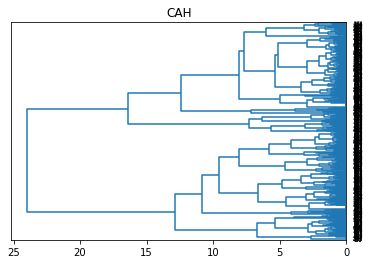

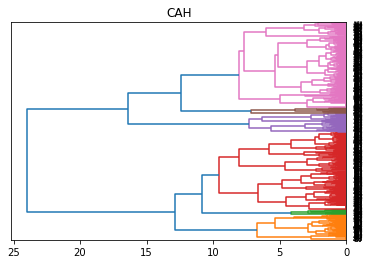

(array([1, 2, 3, 4, 5, 6], dtype=int32), array([ 75,  12, 227,  55,  16, 247], dtype=int64))
Dim. matrice documents-termes = (632, 1381)

Numero du cluster = 1
Effectifs = 75
           freq
proximité    27
piscine      17
parcs        10
propreté     10
personnel     9
situation     9
lhôtel        9

Numero du cluster = 2
Effectifs = 12
           freq
salle         9
bain          8
sauna         3
laccueil      3
personnel     3
sport         3
piscine       2

Numero du cluster = 3
Effectifs = 227
             freq
personnel     124
très           75
chambre        46
agréable       45
emplacement    32
proximité      26
confortable    24

Numero du cluster = 4
Effectifs = 55
           freq
petit        39
déjeuner     32
chambre      20
personnel    15
très         12
prix          9
buffet        8

Numero du cluster = 5
Effectifs = 16
               freq
club             13
compass          10
suite             7
surclassement     7
chambre           4
avon              4
pers

In [217]:
#appel pour la représentation entraînée
g1,mat1 = my_cah_from_doc2vec(corpus_liste_positif,wordsBis,seuil=10)

## Analyse négative review

In [220]:
var=['grade_review','negative_review']
df_negative=df_selection[var]
df_negative

,grade_review,negative_review
1,6.0,"la qualité de la chambre n’était pas top, vieu..."
2,6.0,la propreté
3,6.0,hôtel très vieillissant et pas de shampoing ge...
4,8.0,La porte ne marchait pas bien.\nQuand on met l...
5,8.0,Peut être le fait qu'on ne m'ait pas offert de...
...,...,...
628,9.6,Petit déjeuner très varié mais un peu cher not...
629,9.6,Les vestiaires de la piscine ne sont pas prati...
630,5.0,"Saleté dans les couloirs , draps taché, aucune..."
631,10.0,NaN


In [221]:
newlistnegatif=[]
for i in range(1,df_negative.shape[0]):
    if type(df_negative.negative_review[i])==float :
        newlistnegatif.append(i)

In [222]:
len(newlistnegatif)

134

In [223]:
newlistnegatif

[6,
 10,
 14,
 28,
 30,
 42,
 49,
 51,
 70,
 73,
 74,
 77,
 82,
 83,
 85,
 87,
 99,
 116,
 121,
 128,
 131,
 142,
 167,
 169,
 174,
 179,
 184,
 190,
 191,
 198,
 203,
 205,
 209,
 215,
 222,
 231,
 245,
 246,
 252,
 253,
 257,
 264,
 266,
 282,
 291,
 292,
 293,
 301,
 302,
 311,
 315,
 321,
 327,
 328,
 338,
 339,
 340,
 343,
 345,
 348,
 349,
 350,
 354,
 355,
 356,
 358,
 362,
 365,
 370,
 372,
 373,
 377,
 379,
 380,
 383,
 384,
 385,
 386,
 390,
 403,
 405,
 406,
 407,
 408,
 414,
 425,
 426,
 427,
 436,
 438,
 445,
 448,
 451,
 462,
 467,
 470,
 481,
 486,
 495,
 497,
 504,
 515,
 522,
 523,
 527,
 534,
 540,
 542,
 543,
 546,
 549,
 554,
 557,
 559,
 564,
 568,
 569,
 570,
 571,
 573,
 575,
 578,
 581,
 585,
 586,
 588,
 591,
 595,
 596,
 613,
 616,
 618,
 625,
 631]

In [224]:
df_negative=df_negative.drop(newlistnegatif)
df_negative

,grade_review,negative_review
1,6.0,"la qualité de la chambre n’était pas top, vieu..."
2,6.0,la propreté
3,6.0,hôtel très vieillissant et pas de shampoing ge...
4,8.0,La porte ne marchait pas bien.\nQuand on met l...
5,8.0,Peut être le fait qu'on ne m'ait pas offert de...
...,...,...
627,2.5,Le personnel pas aimable . Arriver le soir les...
628,9.6,Petit déjeuner très varié mais un peu cher not...
629,9.6,Les vestiaires de la piscine ne sont pas prati...
630,5.0,"Saleté dans les couloirs , draps taché, aucune..."


In [225]:
corpus_liste_negatif=[]
for i in range(df_negative.shape[0]):
    corpus_liste_negatif.append(nettoyage_doc(df_negative.iloc[i,1]))

In [226]:
corpus_liste_negatif

[['qualité',
  'chambre',
  'vieux',
  'équipements',
  'rapport',
  'qualité',
  'prix',
  'correct'],
 ['propreté'],
 ['très', 'vieillissant', 'shampoing', 'douche'],
 ['porte',
  'marchait',
  'bien',
  'quand',
  'badge',
  'ouvre',
  'premier',
  'coup',
  'essayer',
  'pleins',
  'fois',
  'télé',
  'beaucoup',
  'option',
  'plus',
  'chaînes',
  'normaux',
  'fallait',
  'attendre',
  'longtemps',
  'passer',
  'onglet',
  'autre'],
 ['peut',
  'être',
  'fait',
  'quon',
  'mait',
  'offert',
  'badge',
  'rapport',
  'saison',
  'dhalloween',
  'sincèrement',
  'cest',
  'vraiment',
  'trouver',
  'quelque',
  'chose'],
 ['vieux',
  'join',
  'accessoires',
  'cher',
  'repas',
  'beaucoup',
  'trop',
  'cher',
  'enfants'],
 ['lors',
  'laccueil',
  'avon',
  'accueilli',
  'monsieur',
  'très',
  'gentil',
  'contre',
  'dame',
  'venu',
  'linterrompre',
  'plusieurs',
  'fois',
  'parce',
  'quelle',
  'fini',
  'journée',
  'quil',
  'devait',
  'faire',
  'quelque',
  '

In [228]:
#************************
#******* Word2Vec *******
#************************
#word2vec
from gensim.models import Word2Vec
modele_n = Word2Vec(corpus_liste_negatif,vector_size=2,window=3,min_count=1)
type(modele_n)
#dimensionnalité
modele_n.vector_size
#taille du voisinage
modele_n.window
#propriété "wv" -> wordvector
words_n = modele_n.wv

In [229]:
sorted_keys_n = sorted(words_n.key_to_index, key = lambda x : words_n.key_to_index.get(x, 0), reverse=True)
 
for key in sorted_keys_n :
    print(key, words_n.key_to_index[key])

préstations 2173
cruciale 2172
limportance 2171
actuel 2170
contexte 2169
dautant 2168
slip 2167
propretédhygiène 2166
légèrement 2165
lordre 2164
rappeler 2163
manager 2162
importe 2161
bruyants 2160
comportement 2159
dentrée 2158
securisant 2157
ferment 2156
parlent 2155
entretien 2154
mériteraient 2153
professionnalisme 2152
petip 2151
distant 2150
latente 2149
portières 2148
lhygiène 2147
première 2146
expérience 2145
confondue 2144
poil 2143
ignoble 2142
lamentable 2141
dépliant 2140
indiquée 2139
veille 2138
mavait 2137
rendue 2136
dérangement 2135
apprécier 2134
cuve 2133
nettoyer 2132
abîmée 2131
résoudre 2130
coussin 2129
sérieusement 2128
charge 2127
afin 2126
revenir 2125
désirons 2124
préalable 2123
insatisfaisante 2122
décrire 2121
staff 2120
membre 2119
signalé 2118
vomit 2117
genre 2116
gagner 2115
lapplicatif 2114
semble 2113
grille 2112
présent 2111
blessé 2110
discutable 2109
optimale 2108
vitrée 2107
paroie 2106
arnaque 2105
sévère 2104
mérite 2103
indignes 2102
conn

In [247]:
liste_mots_n=['propretédhygiène','gardien','portières','couteux','couverture','réceptionnistes','vestiaires','jaccuzi','température','minifrigo']

In [248]:
for mots in liste_mots_n:
     print(words_n.key_to_index[mots])

2166
2096
2148
2079
1965
1669
1543
1435
183
1334


In [249]:
#vérifier que un mot fait parti des termes
"hôtesse" in words_n.key_to_index.keys()

False

In [254]:
#data frame des coordonnées
df_negatif = pd.DataFrame(words_n.vectors,columns=['V1','V2'],index=words_n.key_to_index.keys())

#sous-data frame corresp. aux termes à étudier
dfListe_mots_n = df_negatif.loc[liste_mots_n,:]
dfListe_mots_n = dfListe_mots_n.reset_index()

In [255]:
fig = px.scatter(dfListe_mots_n, x="V1", y="V2",text='index')
fig.update_traces(textposition='top center')
fig.update_layout(title_text='Coordonnées selon les deux premières composantes')
fig.show()

In [256]:
#reconstruire la représentation ci-dessus, mais à 100 dim.
modeleBis_n = Word2Vec(corpus_liste_negatif,vector_size=100,window=3,min_count=1,epochs=100)
wordsBis_n = modeleBis_n.wv

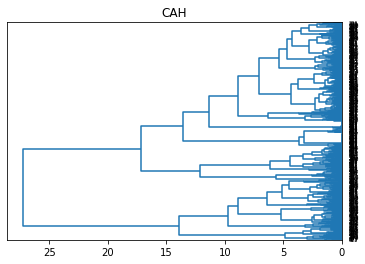

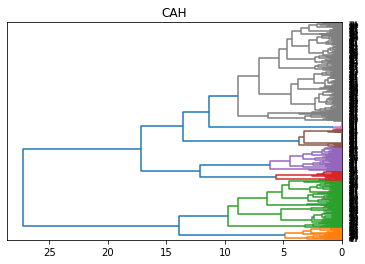

(array([1, 2, 3, 4, 5, 6, 7], dtype=int32), array([ 29, 108,  22,  54,  43,  16, 226], dtype=int64))
Dim. matrice documents-termes = (498, 2160)

Numero du cluster = 1
Effectifs = 29
          freq
prix        22
petit       22
déjeuner    19
cher         7
élevé        6
très         5
assez        4

Numero du cluster = 2
Effectifs = 108
          freq
prix        51
petit       38
chambre     33
très        31
déjeuner    28
qualité     27
trop        23

Numero du cluster = 3
Effectifs = 22
           freq
bain         21
salle        19
toilette      3
baignoire     3
porte         3
propreté      2
frigo         2

Numero du cluster = 4
Effectifs = 54
            freq
chambre       31
manque        17
café          14
bouilloire    10
chambres       9
machine        6
frigo          5

Numero du cluster = 5
Effectifs = 43
           freq
rien         39
tout          9
parfait       4
reprocher     3
dire          2
signaler      2
comme         1

Numero du cluster = 6
Effectifs

In [257]:
#appel pour la représentation entraînée
g2,mat2 = my_cah_from_doc2vec(corpus_liste_negatif,wordsBis_n,seuil=10)

# Suppression des doublons

In [126]:
df = df.drop_duplicates(keep='first')

# Nombre de nuitées

In [127]:
print(df['nuitee'].value_counts())

1    1354
2     538
3     280
4      81
5      19
6       6
7       5
Name: nuitee, dtype: int64


In [128]:
df.shape

(2283, 16)

In [129]:
nuitees=df['nuitee'].value_counts()

In [130]:
nuitees=nuitees.to_frame()
nuitees = nuitees.reset_index()

In [131]:
import plotly.express as px
fig = px.bar(nuitees, x='index', y='nuitee', title="Nombre de nuits par durée du séjour")
fig.show()

In [132]:
#Step 1: Create grouper
grouper = df.groupby(['annee_sejour','mois_sejour'])

#Step 2: Filter column and apply aggregation
grouper['nuitee'].sum().reset_index()

,annee_sejour,mois_sejour,nuitee
0,2019,Décembre,192
1,2020,Août,40
2,2020,Février,209
3,2020,Janvier,178
4,2020,Juillet,24
5,2020,Mars,106
6,2020,Octobre,53
7,2020,Septembre,53
8,2021,Août,128
9,2021,Décembre,187


In [133]:
#Step 2: Filter column and apply aggregation
grouper['positive_review','negative_review'].count().reset_index()

C:\Users\cornuch\AppData\Local\Temp\ipykernel_16752\260887980.py:2: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



,annee_sejour,mois_sejour,positive_review,negative_review
0,2019,Décembre,21,16
1,2020,Août,5,4
2,2020,Février,49,36
3,2020,Janvier,19,14
4,2020,Juillet,10,9
5,2020,Mars,23,15
6,2020,Octobre,18,16
7,2020,Septembre,15,11
8,2021,Août,24,21
9,2021,Décembre,43,31


In [232]:
fig = px.sunburst(df, path=['annee_sejour', 'mois_sejour'], values='nuitee',
                  color='grade_review',
                  color_continuous_scale='RdBu',
                  color_continuous_midpoint=np.average(df['grade_review'], weights=df['nuitee']))
fig.show()

C:\ProgramData\Anaconda3\lib\site-packages\plotly\express\_core.py:1637: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\ProgramData\Anaconda3\lib\site-packages\plotly\express\_core.py:1637: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



# Country

In [135]:
#recherche des personnes n'ayant pas indiqué "Country"
df[df['Country'].isna()]

,Names,Country,room_type,reservation_type,Duration,traveler_infos,date_review,review_title,grade_review,positive_review,negative_review,usefulness_review,hotel,nuitee,mois_sejour,annee_sejour
719,Stefano,NaN,Chambre Supérieure – Côté Lac (2 Adultes + 2 E...,2 nuits · Février 2020,Février 2020,Famille,Commentaire envoyé le 2 février 2020,Bien,7.1,NaN,NaN,3 personnes ont trouvé ce commentaire utile. U...,Disney's Newport Bay Club,2,Février,2020
1181,Lex,NaN,Chambre Supérieure,1 nuit · Août 2021,Août 2021,Couple,Commentaire envoyé le 29 août 2021,Zeer slecht,1.0,NaN,NaN,Utile Pas utile,Disney's Newport Bay Club,1,Août,2021


In [136]:
pays=df['Country'].value_counts()

In [137]:
pays=pays.to_frame()
pays=pays.reset_index()

In [138]:
pays

,index,Country
0,France,913
1,Belgique,206
2,Royaume-Uni,151
3,Allemagne,119
4,Espagne,84
...,...,...
80,Corée du Sud,1
81,Jersey,1
82,Afrique du Sud,1
83,Géorgie,1


In [139]:
pays_top30=pays.head(30)
print(pays_top30)

                  index  Country
0                France      913
1              Belgique      206
2           Royaume-Uni      151
3             Allemagne      119
4               Espagne       84
5              Pays-Bas       83
6                Italie       70
7       Arabie saoudite       64
8                Suisse       63
9                Israël       52
10  Émirats arabes unis       34
11               Brésil       32
12               Koweït       30
13              Irlande       30
14             Portugal       27
15                Japon       19
16              Turquie       18
17           États-Unis       17
18                Qatar       17
19               Russie       15
20           Luxembourg       14
21             Roumanie       13
22                Grèce       13
23             Autriche       12
24              Ukraine       11
25            Australie       10
26           La Réunion       10
27   République tchèque        8
28             Danemark        7
29        

In [140]:
fig = px.bar(pays_top30,x='index', y='Country', title="Effectifs par pays")
fig.show()

In [141]:
pays_pourcent=df['Country'].value_counts()*100/df.shape[0]
pays_poucent=pays_pourcent.to_frame()
pays_pourcent=pays_pourcent.reset_index()

In [142]:
print(pays_pourcent)

             index    Country
0           France  39.991240
1         Belgique   9.023215
2      Royaume-Uni   6.614104
3        Allemagne   5.212440
4          Espagne   3.679369
..             ...        ...
80    Corée du Sud   0.043802
81          Jersey   0.043802
82  Afrique du Sud   0.043802
83         Géorgie   0.043802
84        Finlande   0.043802

[85 rows x 2 columns]


In [143]:
pays_top15_pourcent=pays_pourcent.head(15)

In [144]:
fig = px.bar(pays_top15_pourcent,x='index', y='Country', title="Fréquence pour les 15 pays les plus représentés")
fig.show()

# Grade review

In [145]:
df['grade_review'].round(decimals = 0)

0       10.0
1        6.0
2        6.0
3        6.0
4        8.0
        ... 
2280    10.0
2281     9.0
2282     9.0
2283     4.0
2284     5.0
Name: grade_review, Length: 2283, dtype: float32

In [146]:
notes=df['grade_review'].value_counts()

In [147]:
notes=notes.to_frame()
notes=notes.reset_index()

In [148]:
fig = px.bar(notes,x='index', y='grade_review', title="Effectifs des notes")
fig.show()

# Duration

dates : décembre 2019 à décembre 2022

In [149]:
df['Duration'].value_counts()

Mars 2022         232
Novembre 2021     142
Février 2020      131
Janvier 2022      130
Décembre 2021     127
Octobre 2021      122
Février 2022      117
Janvier 2020      113
Septembre 2021    111
Décembre 2019     104
Octobre 2022       86
Août 2021          85
Juillet 2022       82
Juillet 2021       79
Mai 2022           70
Septembre 2022     67
Novembre 2022      67
Mars 2020          64
Avril 2022         64
Août 2022          62
Juin 2022          56
Septembre 2020     43
Juin 2021          40
Octobre 2020       40
Août 2020          26
Juillet 2020       17
Décembre 2022       6
Name: Duration, dtype: int64

In [150]:
df_duree=df['Duration'].map(str)
df_duree

0       Septembre 2022
1        Novembre 2022
2        Novembre 2022
3        Novembre 2022
4        Novembre 2022
             ...      
2280      Janvier 2020
2281     Décembre 2019
2282      Janvier 2020
2283      Janvier 2020
2284     Décembre 2019
Name: Duration, Length: 2283, dtype: object

# Review title

In [151]:
titre=df['review_title'].value_counts()

In [152]:
titre.head(30)

Exceptionnel         404
Très bien            310
Bien                 215
Fabuleux             211
Agréable             111
Passable              93
Décevant              54
Mauvais               45
Assez médiocre        34
Médiocre              20
Superbe               11
Magique                8
Parfait                5
Avis mitigé            4
très bien              4
Bien                   4
parfait                3
bien                   3
magique                3
Magnifique             3
Bon                    2
Séjour parfait         2
magnifique             2
magico                 2
déçu                   2
Excellent !            2
Un séjour magique      2
genial                 2
Très bon séjour        2
Super                  2
Name: review_title, dtype: int64

# Profiling

In [153]:
!pip install pandas_profiling

In [154]:
from pandas_profiling import ProfileReport

In [155]:
profile = ProfileReport(df, title='Analyse du fichier Newport hotel', html={'style':{'full_width':True}})
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
#profile.to_json()

In [ ]:
#profile.to_file(output_file="newport.html")